<a href="https://colab.research.google.com/github/RealMyeong/NLP_kaggle_transcription/blob/main/Start_Here_A_Gentle_Introduction_transcription.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[참고 노트북](https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction)

[대회 페이지](https://www.kaggle.com/competitions/home-credit-default-risk/overview)


Introduction : Home Credit Default Risk Competition

이 노트북은 머신 러닝 대회에 처음이거나 문제애 대한 친절한 introduction을 원하는 사람들을 위한 노트북입니다. 어떻게 머신러닝을 시작하는지에 대한 기초를 보여드리기 위해 모델을 완성하거나 많은 데이터를 함께 묶는 작업을 건너뛰지 않을 것입니다.

이 대회의 목적은 과거의 대출 신청 데이터를 사용하여 신청자가 대출금을 상환할 수 있는지 여부를 예측하는 것입니다. 이는 표준 감독 분류 작업(standard supervised classification task)입니다.

- Supervised : 라벨이 훈련 데이터에 포함 되어있고 목표가 모델이 피쳐에서 라벨을 예측하는 방법을 배우도록 훈련하는 것
- Classification : 라벨이 binary variable, 0(대출을 제때 상환함), 1(대출 상환이 어려움)

## Data

데이터는 무은행 인구에게 제공되는 신용 한도(대출) 전용 서비스인 홈 크레딧에 의해 제공됩니다.  
사용자가 대출을 상환할 수 있는지 아닌지를 예측하는 것은 사업에 가장 필요합니다, 그리고 홈 크레딧은 머신 러닝 커뮤니티가 이 작업을 돕기 위해 어떤 종류의 모델을 개발할 수 있는지 보기 위해 kaggle에서 이 대회를 주최했습니다.  
데이터에는 7 가지의 다른 source가 있습니다.
- application_train//test : 홈 크레딧에서 대출 신청에 대한 정보를 가지고 있는 메인 훈련, 테스트 데이터입니다. 모든 대출은 row를 가지고있고 SK_ID_CURR 피쳐에 의해 구분됩니다. 훈련 데이터에는 TARGET이 있습니다.
- bureau : 다른 금융 기관으로부터 받은 고객의 이전 신용 정보에 관한 데이터입니다. 각각의 이전 신용정보는 bureau에서 자체 행으르 가지지만, 하나의 application data에 있는 대출은 여러개의 이전 신용정보를 가질 수 있습니다.
- bureau_balance : bureau에 있는 이전 신용정보에 대한 월 별 데이터. 각 행은 이전 크레딧의 한 달이며, 하나의 크레딧은 크레딧 길이의 각 달에 하나씩 여러 행을 가질 수 있습니다.
- previous_application : application data에 대출이 있는 사람 중 이전에 홈 크레딧에 대출 신청 한 사람. 각각의 현재 대출은 여러개의 이전 대출을 가질 수 있습니다. 각 이전 신청은 하나의 행을 가지고 SK_ID_PREV에 의해 구분됩니다.
- POS_CASH_BALANCE : 고객이 홈 크레딧으로 받은 이전 판매 시점 또는 현금 대출에 대한 월별 데이터. 각 행은 이전 판매 시점 또는 현금 대출의 한 달이며, 하나의 이전 대출은 여러 행을 가질 수 있습니다.
- credit_card_balance : 홈 크레딧에서 신용 카드 이용 고객에 대한 월별 데이터
- installments_payment : 홈 크레딧에서 받은 대출에 대한 지불 내역.

아래 다이어그램은 모든 데이터가 어떻게 연관 되어있는지를 보여줍니다.

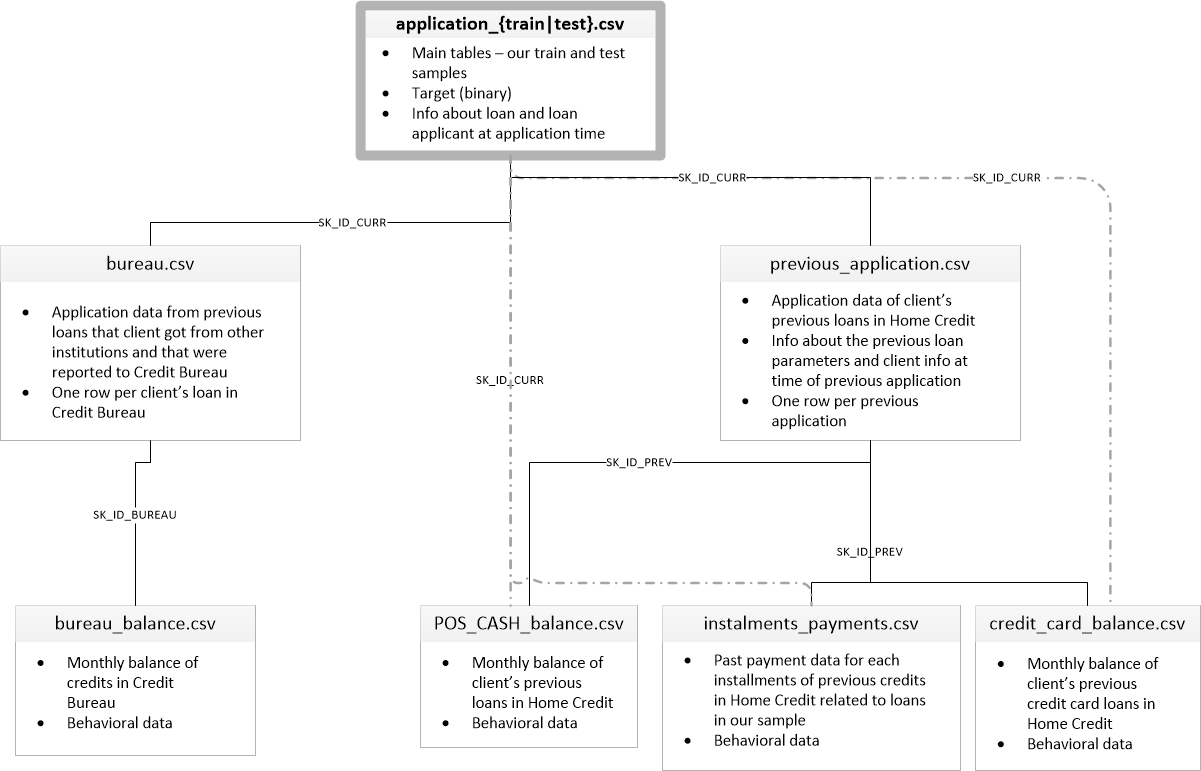

게다가, HomeCredit_columns_description.csv 에서 모든 컬럼들에 대한 정의를 제공해줍니다.

이 노트북에서 우리는 메인 application training/testing data만을 사용할 것입니다. 비록 우리가 더 중요한 비교를 하고싶고, 모든 데이터를 사용하고 싶지만, 지금은 좀 더 다루기 쉬운 하나의 파일만을 사용하겠습니다. 이것은 우리가 후에 개선할 수 있는 baseline을 만들 수 있게 해줄 것입니다.

이 프로젝트를 통해서 조금씩 문제를 이해하며 진행하는 것이 모든 것을 한 번에 하려다가 길을 헤매는 것 보다 좋습니다.

## Metric : ROC AUC
일단 우리가 데이터에 대해 이해를 했다면, 이번에는 우리가 제출한 파일이 어떻게 평가받는지에 대한 평가지표를 이해할 필요가 있습니다. 이 경우에는, 널리 쓰이는 분류 평가지표 Receiver Operating Characteristic Area Under the Curve (ROC AUC, also sometimes called AUROC) 를 이용해 평가합니다.

ROC AUC는 들으면 좀 겁이 날 수 있습니다. 하지만 여러분이 두 개의 개별 개념을 이해할 수 있다면 ROC AUC는 비교적 간단합니다.

ROC커브는 False Positive Rate에 대한 True Positive Rate그래프 입니다.
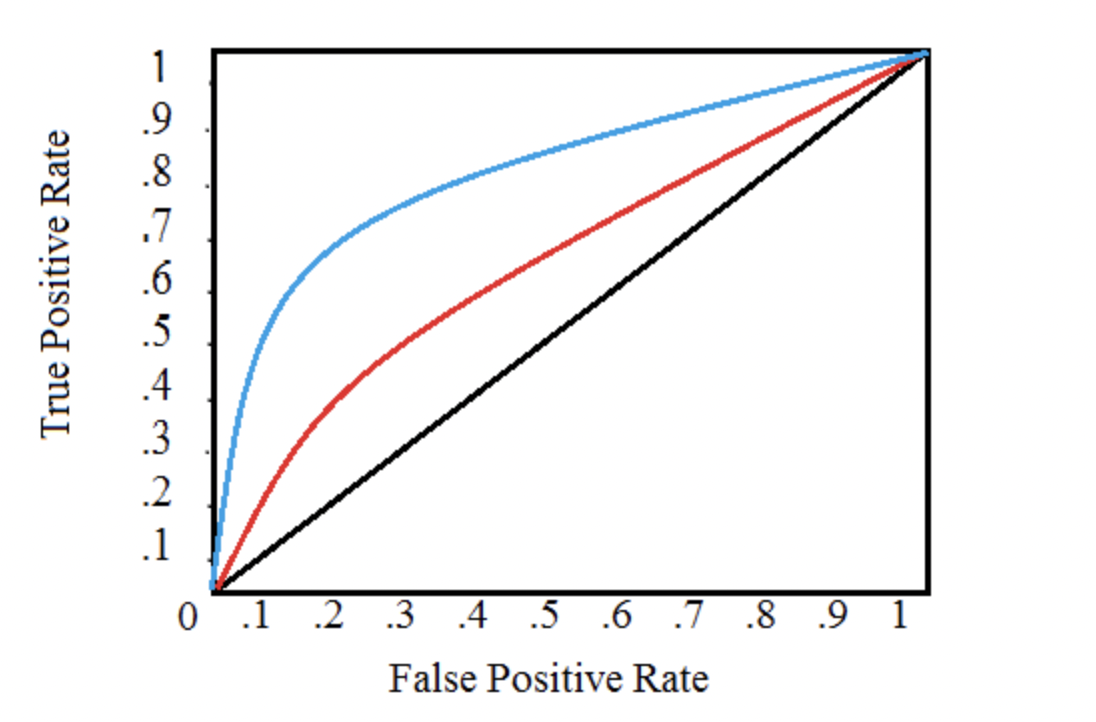

그래프에서 각각의 선은 각 모델을 의미합니다. 그리고 선의 모양에 따라 positive instance를 분류하는 데 사용되는 임계값이 변함을 알 수 있습니다.  
임계값은 오른 쪽 위의 0에서 시작하여 왼쪽 아래의 1까지 갑니다. 그리고 곡선이 왼쪽 위로 구부러져 있으면 더 좋은 모델이라는 것을 의미합니다. 예를 들어 파란색 모델이 빨간색 모델보다 좋다는 의미입니다.

Area Under the Curve(AUC)는 말 그대로 곡선 아래 넓이를 의미합니다. 단순히 ROC 커브의 아래쪽 면적입니다. 평가 기준은 0~1사이이며 좋은 모델일수록 높은 점수를 받습니다. 단순히 랜덤으로 추측하는 모델은 ROC AUC 점수를 0.5점 받을 것입니다.

우리가 분류모델을 ROC AUC를 이용해 평가할 때, 우리는 0 또는 1을 예측 하는것이 아니라, 0과 1사이의 확률을 만들어 냅니다. 우리는 보통 정확도의 관점에서 생각하기 때문에 혼란스러울 수 있습니다. 하지만 클래스 불균형 문제가 있을 때 정확도로 평가하는 것은 좋지않습니다.  

우리가 사용하려는 데이터의 배경과, 성능을 최대화 할 수 있는 평가지표를 알고 있는 것이 아니기때문에 EDA를 진행 하겠습니다. 


## Imports
필요한 모듈을 임포트 해줍니다.

In [4]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system management
import os

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Read in Data
먼저, 사용할 수 있는 데이터 파일 목록을 보겠습니다.  
총 9개의 파일이 있습니다.

훈련에 필요한 주요 파일 1개, 테스트에 필요한 주요 파일 1개, 제출 예시 파일 1개, 그리고 6개의 대출에 대한 추가적인 정보를 갖고 있는 파일들로 이루어져 있습니다.


In [5]:
# List files available
print(os.listdir('/content/drive/MyDrive/AIFFEL/NLP_캐글필사/LigntGBM_7th_place_solution_data/home-credit-default-risk'))

['application_test.csv', 'sample_submission.csv', 'HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv']


In [6]:
# training data
app_train = pd.read_csv('/content/drive/MyDrive/AIFFEL/NLP_캐글필사/LigntGBM_7th_place_solution_data/home-credit-default-risk/application_train.csv')
print('Training data shape : ', app_train.shape)
app_train.head()

Training data shape :  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


훈련 데이터는 307511개의 행, 122개의 피쳐로 이루어져 있습니다. 122개 중 하나는 TARGET입니다.

In [7]:
# Testing data features
app_test = pd.read_csv('/content/drive/MyDrive/AIFFEL/NLP_캐글필사/LigntGBM_7th_place_solution_data/home-credit-default-risk/application_test.csv')
print('Testing data shape : ', app_test.shape)
app_test.head()

Testing data shape :  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


테스트 데이터에는 타겟없는 121개의 컬럼만 있는 것을 확인할 수 있습니다.

## Exploratory Data Analysis(EDA)
EDA는 통계를 계산하고 수치를 만들어 데이터 내의 추세, 이상 징후, 패턴 또는 관계를 찾는 개방형 프로세스입니다. EDA의 목적은 우리가 가지고 있는 데이터가 무엇을 말하는지 배우는 것입니다. EDA는 보통 전체적으로 확인을 하는것에서 시작하여 데이터의 흥미로운 영역을 발견함에 따라 특정 영역으로 좁혀집니다.

연구 결과는 그 자체로 흥미로울 수도 있고, 어떤 피쳐를 사용할지 결정하는데 도움을 주는 등 모델링 선택에 대한 정보를 주기도 합니다.

### Examine the Distribution of the Target Column
Target은 우리가 예측하려는 값입니다. 0은 제때 대출상환 하는 것, 1은 대충 상환이 어려운 고객을 뜻합니다.

우리는 먼저 각 범주(0, 1)에 속하는 카테고리의 수를 조사하겠습니다.

In [8]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

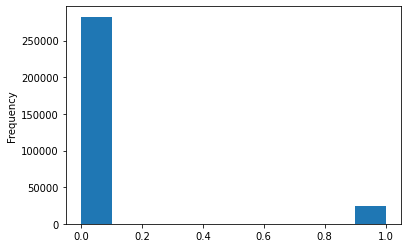

In [9]:
app_train['TARGET'].astype(int).plot.hist()

위 그래프로 볼 때, 클래스 불균형 문제가 있다는 것을 알 수 있습니다. 제때 상환을 한 사람들이 상환하지 못한 사람보다 많습니다.  
일단 우리가 더 정교한 머신 러닝 모델에 들어가면, 우리는 이런 불균형을 반영하기 위해 데이터에서의 표현에따라 클래스에 가중치를 부여할 수 있습니다.

### Examine Missing Values
결측치의 비율을 확인 해보겠습니다.

In [10]:
# Function to calculate missing values by column
def missing_values_table(df):
  # Total missing values
  mis_val = df.isnull().sum()

  # Percentage of missing values
  mis_val_percent = 100 * df.isnull().sum() / len(df)

  # Make a table with the results
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

  # Rename the columns
  mis_val_table_ren_columns = mis_val_table.rename(
      columns = {0 : 'Missing Values', 1 : '% of Total Values'}
  )

  # Sort the table by percentage of missing descending
  mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)

  # Print some summary information
  print('Your selected dataframe has ' + str(df.shape[1]) + ' columns. \n'
  'There are ' + str(mis_val_table_ren_columns.shape[0]) + ' columns that have missing values.')

  # Return the dataframe with missing information
  return mis_val_table_ren_columns

In [11]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns. 
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


머신 러닝 모델을 만들 때, 우리는 결측치를 채워줘야 할 것입니다. 나중에, 우리는 XGBoost같이 imputation없이 결측치를 다룰 수 있는 모델을 쓸 것입니다.  
다른 방법으로는 결측치의 비율이 높은 컬럼을 그냥 지워버리는 것이 있습니다. 근데 지워버린 컬럼이 우리의 모델에 필요한 정보를 가지고 있을지는 아직 모르기때문에 모든 컬럼을 일단 가지고 있겠습니다.

### Column Types
컬럼들의 데이터 타입을 확인 해보겠습니다. int64, float64는 numeric variables(이산형 변수이거나 연속형 변수)입니다. object는 문자열을 포함하거나 범주형 피쳐를 포함하고 있습니다.

In [12]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [13]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

대부분의 범주형 변수가 비교적 적은 수의 고유 항목을 갖고 있습니다. 우리는 이 범주형 변수들을 다룰 방법을 찾아야 할 것입니다.

### Encoding Categorical Variables
다음 단계를 진행하기 전에, 우리는 이 성가신 범주형 변수들을 처리해야합니다. 머신 러닝 모델은 불행하게도 범주형 변수를 다루지 못합니다.(LightBGM 같은 모델들을 제외하고)  
따라서, 우리는 범주형 변수들을 모델에 전달하기 전에 숫자로 바꾸는 방법을 찾아야합니다. 이러한 과정에는 두 가지 방법이 있습니다.
- Label encoding : 아래 그림과 같이 카테고리별 고유한 정수로 바꿔주는 방법이 있습니다. 이 방법은 새로운 컬럼을 만들지 않아도 됩니다.
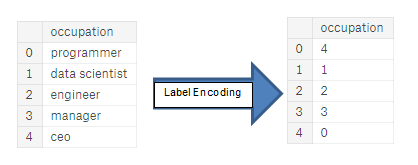

- One-hot encoding : 아래 그림과 같이 각각의 고유한 카테고리로 새로운 컬럼을 만드는 방법입니다. 각 카테고리에 속하는 개체는 1의 값을 가지고 나머지 카테고리에 컬럼에 대해서는 0의 값을 가집니다. 
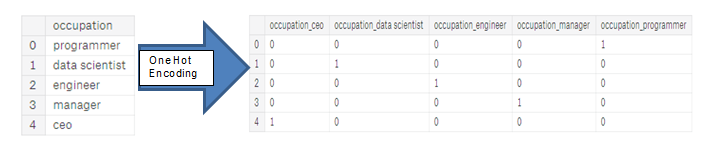

Label encoding에는 문제가 있습니다. 각 범주에 할당된 수는 임의의 수이고 각 카테고리의 특성을 반영하지 못합니다. 위의 예에서 programmer가 4, scientist가 1이라는 정수를 부여 받았습니다. 하지만 다시 같은 과정을 반복했을 때 서로 번호가 바뀌거나 아예 다른 번호를 받을 수도 있습니다. 그리고 4, 1이라는 수를 할당 받게되면 우리가 원치않는 가중치가 부여될 수도 있습니다. 컴퓨터가 볼 때 4가 1보다 크니까 좀 더 중요한가? 라는 생각을 할 수도 있기 때문입니다. 따라서 카테고리가 2개(남자/여자)가 아닌 그 이상의 카테고리를 분류할 때는 one-hot encoding이 좀 더 안전합니다.

하지만 one-hot encoding에서도 카테고리가 많아지면 차원이 너무 커진다는 단점이 있습니다. 이를 해결하기 위해서 원-핫 인코딩을 수행한 수 PCA또는 다른 차원 축소 방법을 수행하여 차원 수를 줄일 수 있습니다. (차원을 줄이면서도 정보를 최대한 보존하려고 해야합니다.)

이 노트북에서는 카테고리가 2개만 있는 범주형 변수에 대해서는 라벨 인코딩을 진행하고, 카테고리가 2개 이상인 범주형 변수에 대해서는 원-핫 인코딩을 진행합니다. 이 과정은 프로젝트를 진행함에 따라 변경되어야 할 수도 있지만, 현재로서는 이것이 어떤 결과를 가져올지 한 번 지켜보겠습니다.

### Label Encoding and One-Hot Encoding

라벨 인코딩에는 사이킷런의 LabelEncoder를 사용하고, 원-핫 인코딩에는 판다스의 get_dummies(df)를 사용하겠습니다.

In [14]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
  if app_train[col].dtype=='object':
    # If 2 or fewer unique categories
    if len(list(app_train[col].unique())) <= 2:
      # Train on the training data
      le.fit(app_train[col])
      # Transform both training and testing data
      app_train[col] = le.transform(app_train[col])
      app_test[col] = le.transform(app_test[col])

      # Keep track of how many columns were label encoded
      le_count += 1

print('%d columns were label encoded' % le_count)

3 columns were label encoded


In [15]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape : ', app_train.shape)
print('Testing Features shape : ', app_test.shape)

Training Features shape :  (307511, 243)
Testing Features shape :  (48744, 239)


### Aligning Training and Testing Data
훈련, 테스트 데이터는 같은 갯수의 features(columns)를 가질 필요가 있습니다. 원-핫 인코딩은 테스트 데이터에서는 없는 카테고리를 가진 범주형 변수가 훈련 데이터에 있기 때문에 훈련 데이터에서 좀 더 많은 컬럼을 만들었습니다.  
훈련 데이터에만 있는 컬럼을 지우기 위해 우리는 데이터프레임을 align할 필요가 있습니다.  
먼저 훈련 데이터에서 target컬럼을 추출 해옵니다.  
그 다음 align을 진행할 때, 반드시 axis=1로 지정해서 컬럼 기준으로 align하게 만들어야합니다. 


In [16]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join='inner', axis=1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


### Back to Exploratory Data Analysis

#### Anomalies
EDA를 수행할 때 항상 경계해야 하는 한 가지 문제는 데이터 내의 이상 현상입니다. 이는 잘못된 숫자, 측정 장비 오류 또는 유효하지만 극단적인 측정때문일 수 있습니다.  
이상 현상을 정량적으로 파악하기 위해서는 describe를 이용해 컬럼들의 통계를 보는 방법이 있습니다.  
DAYS_BIRTH 컬럼에 있는 숫자들은 현재의 대출 신청을 기준으로 측정했기 때문에 음수입니다.  
이러한 수를 년단위로 보려면 -1을 곱해주고 365로 나눠주면 됩니다.

In [17]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

나이 분포를 봤을 때 어느정도 합리적인 것 같습니다. 너무 높거나 너무 낮은 값은 없어보입니다.

이번에는 days of employment(근무 일수)를 살펴보겠습니다.

In [18]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

최대 근무일수가 거의 1000년이 나옵니다. 좀 이상한 것 같습니다.. ㅎㅎ
히스토그램을 그려서 시각적으로 확인 해보겠습니다.


Text(0.5, 0, 'Days Employment')

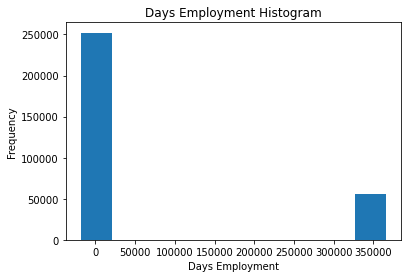

In [19]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

근무 일수가 1000년으로 기록되어 있는 사람들이 채무 불이행률이 더 높거나 낮은 경향이 있는지 알아보겠습니다.

In [21]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]

print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


이상치로 기록된 사람들이 기본값 비율이 낮은 것으로 나타났습니다.

이상치를 처리하는 방법은 설정된 규칙이 없는 정확한 상황에 따라 달라집니다.  가장 안전한 접근법 중 하나는 이상치를 그냥 결측치로 설정하고 머신 러닝을 진행하기 전에 채워넣는 방법입니다.(imputation 이용)  
이번 경우에는 모든 이상치가 정확히 같은 값을 가지고 있기 때문에, 이 모든 대출이 공통점을 공유하는 경우에 대비하여 동일한 값으로 채우려고 합니다.  
이상치들이 어느정도 중요한 것 처럼 보이기때문에, 우리는 모델에게 실제로 이 값들을 채웠다고 알려주고 싶습니다. 
따라서 우리는 이상치를 np.nan으로 채우고 새로운 컬럼을 추가해서 이 값이 이상치였는지에 대한 boolean값을 표시해주겠습니다.

Text(0.5, 0, 'Days Employment')

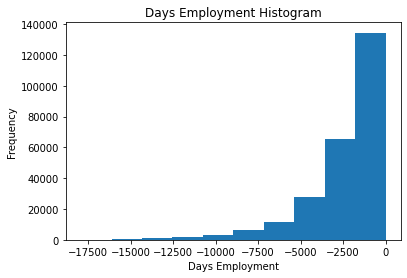

In [22]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243 : np.nan}, inplace=True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

데이터의 분포가 우리가 기대하는 것과 일치하는 듯해 보입니다. 또한 이러한 값이 원래 이상치였다는 것을 모델에게 알리기 위해 새 컬럼을 만들었습니다. 굳이 이런 컬럼을 만든 이유는 나중에 우리가 np.nan값을 다른 값으로 채워줄 예정이기 때문입니다.  
DAYS가 들어간 다른 컬럼들은 명확한 특이값 없이 예상값과 관련있는 것으로 보입니다.

여기서 아주 중요한 것이 있습니다. 바로 우리가 훈련 데이터에 해주는 모든 것들은 테스트 데이터에도 똑같이 적용 해줘야한다는 점입니다.  
그럼 위 과정을 테스트 데이터에서도 진행 해주겠습니다.

In [23]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test['DAYS_EMPLOYED'] == 365243
app_test['DAYS_EMPLOYED'].replace({365243 : np.nan}, inplace=True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


#### Correlations
지금까지 우리는 범주형 변수와 이상치에 대한 처리를 했습니다.  
데이터를 이해하는 또 다른 방법 중 하나는 타겟과 피쳐간의 상관관계를 보는 것입니다. 우리는 피어슨 상관계수를 .corr 메서드를 이용해서 계산할 수 있습니다.

상관 계수는 피쳐간의 연관성을 설명하는 아주 대단한 방법은 아니지만, 데이터 간에 긍정적인 관련성이 있을거라는 생각을 하게 해줍니다.

상관계수의 절대값에 대한 해석은 다음과 같습니다.
- .0 ~ .19 : 거의 관계 없음
- .20 ~ .39 : 관계 없는 편임
- .40 ~ .59 : 평범함
- .60 ~ .79 : 어느정도 관계가 있는 편임
- .8 ~ 1.0 : 미친 상관관계



In [24]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

양의 상관계수를 갖는 컬럼 중에서 DAYS_BIRTH를 한 번 살펴보겠습니다. 상관 계수가 양수라는 말은 값이 커질 때 타겟의 값도 커진다는 의미입니다. 근데 데이터에서 나이는 현재 날짜기준으로 측정해서 음수입니다.  
따라서 나이가 많아질수록(값이 음의 방향으로 커짐) 대출 불이행(target == 1) 가능성이 낮아집니다.  
이렇게 보니까 좀 헷갈리네요...  
DAYS_BIRTH를 절대값으로 바꾸고 다시 살펴보겠습니다.



In [25]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982694

나이와 타겟은 음의 선형 관계를 갖고 있습니다. 이 말은 나이가 많아질수록 타겟 값이 작아진다는 뜻인데 타겟 값이 0이면 채무 이행을 잘 한다는 소리입니다. 따라서 나이가 많을수록 돈을 더 잘 갚는다고 보면 될 것 같습니다.

그래프로 시각화해서 한 번 나이별 고객 분포를 보겠습니다.

Text(0, 0.5, 'Count')

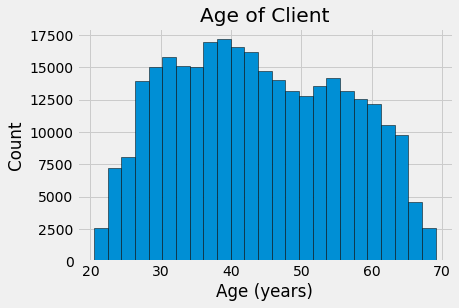

In [26]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor='k', bins=25)
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')

그래프를 봤을 때 나이의 분포에는 이상치가 있는 것 처럼 보이지는 않습니다.

이제 나이와 타겟 사이의 관계를 시각화 하기 위해서 커널 밀도 추정 그래프(KDE)를 그려보겠습니다. KDE 그래프는 단일 변수에 대한 분포를 보여주는 것이고 이는 부드러운 히스토그램이라고 볼 수 있습니다.

seaborn의 kdeplot을 이용하겠습니다.

Text(0.5, 1.0, 'Distribution of Ages')

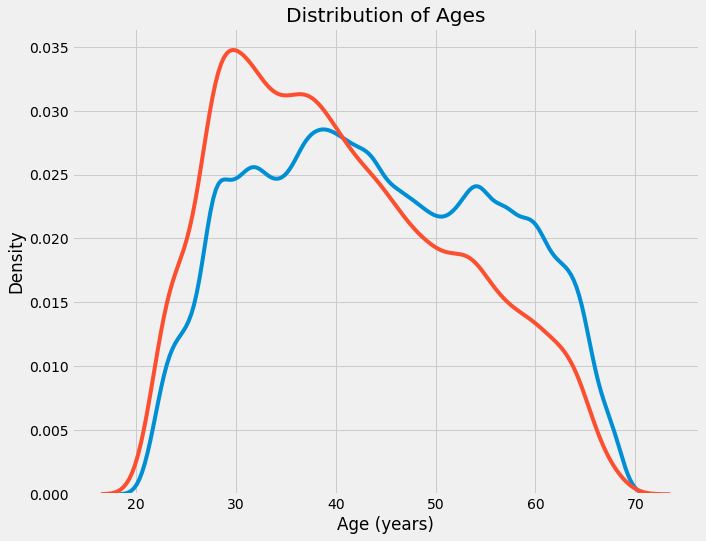

In [27]:
plt.figure(figsize=(10,8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH']/365, label='target==0')

# KDE plot of loadns which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET']==1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Ages')

target==1인 곡선은 어린 나이쪽으로 치우쳐 있습니다. 비록 두드러지는 상관관계가 있는 것은 아니지만, 이 변수는 머신 러닝 모델에 유용할 것 같습니다.  
또 다른 방법(연령대별 평균 대출금 상관 실패)으로 상관관계를 확인해보겠습니다. 
이 그래프를 그리기 위해서 먼저 나이 카테고리를 5년 단위로 묶어 주겠습니다. 
그리고나서, 각 나이대별로 상환 실패 비율을 알 수 있도록 타겟값의 평균을 구하겠습니다.

In [29]:
# Age information into a seperate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num=11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [30]:
# Group by the bin and calculate averages
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0.5, 1.0, 'Failure to Repay by Age Group')

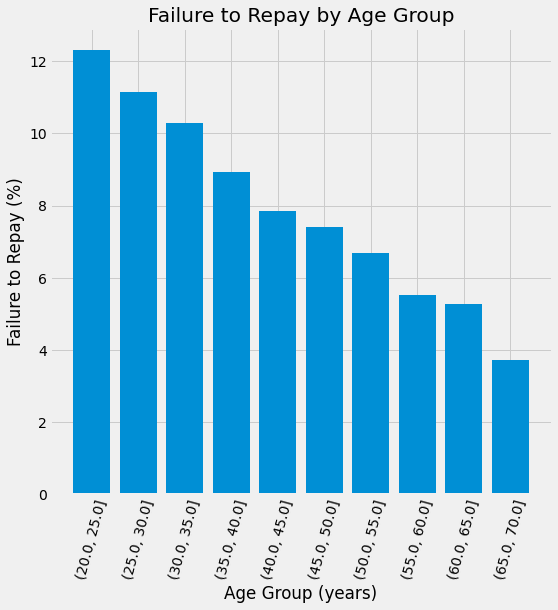

In [31]:
plt.figure(figsize=(8,8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation=75)
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group')

어린 고객일수록 대출을 상환하지 않을 가능성이 높다는 분명한 추세가 보입니다. 가장 어린 그룹은 대출 상환을 하지 않는 비율이 10%가 넘고, 가장 나이가 많은 그룹은 5% 아래입니다.  
이러한 정보는 은행에서 그대로 쓰일 수 있습니다. 어린 고객일수록 대출을 상환하지 않을 가능성이 크기 때문에 더 많은 지침이나 재정 계획에대한 팁을 제공해야 할것입니다. 이는 은행이 어린 고객들을 차별하라는 것을 의미하는 게 아니라, 어린 고객들이 제때 상환할 수 있도록 예방 조치를 취하는 것이 현명하다는 것을 의미합니다.

#### Exterior Sources
타겟과 강한 음의 상관관계가 있는 변수들은 EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3입니다. 문서에 따르면, 이 피쳐들은 "normalized score from external data source"를 나타낸다고 돼있습니다. 정확히 무슨 의미인지는 모르겠지만, 한 번 살펴보겠습니다.

먼저 EXT_SOURCE 피쳐들과 타겟의 상관관계를 각각 보겠습니다.

In [32]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

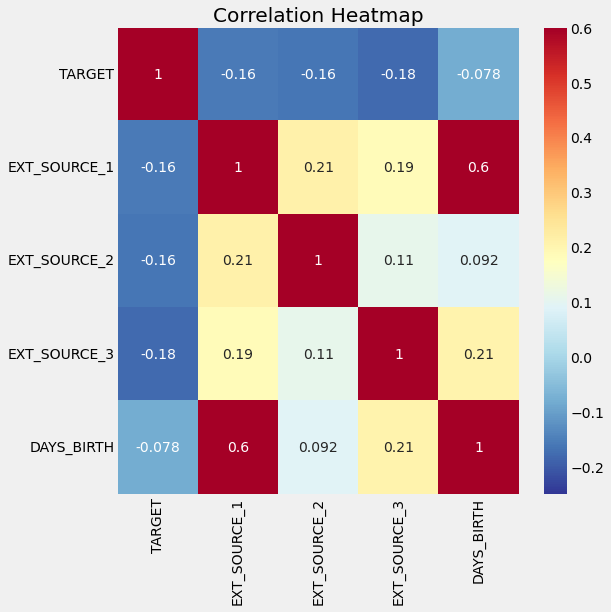

In [33]:
plt.figure(figsize=(8,8))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin=-0.25, annot=True, vmax=0.6)
plt.title('Correlation Heatmap')

상관계수로 미루어볼때 EXT_SOURCE의 값이 증가하면, 고객들은 대출을 더 잘 상환할 것 같다고 볼 수 있습니다.

또한, DAYS_BIRTH와 EXT_SOURCE_1이 양의 상관계수를 갖는 것을 보았을 때 EXT_SOURCE의 요소 중 하나가 고객의 나이라는 것을 알 수 있습니다.

이제 각 피쳐들의 분포를 타겟의 값에 따른 색으로 시각화해보겠습니다. 

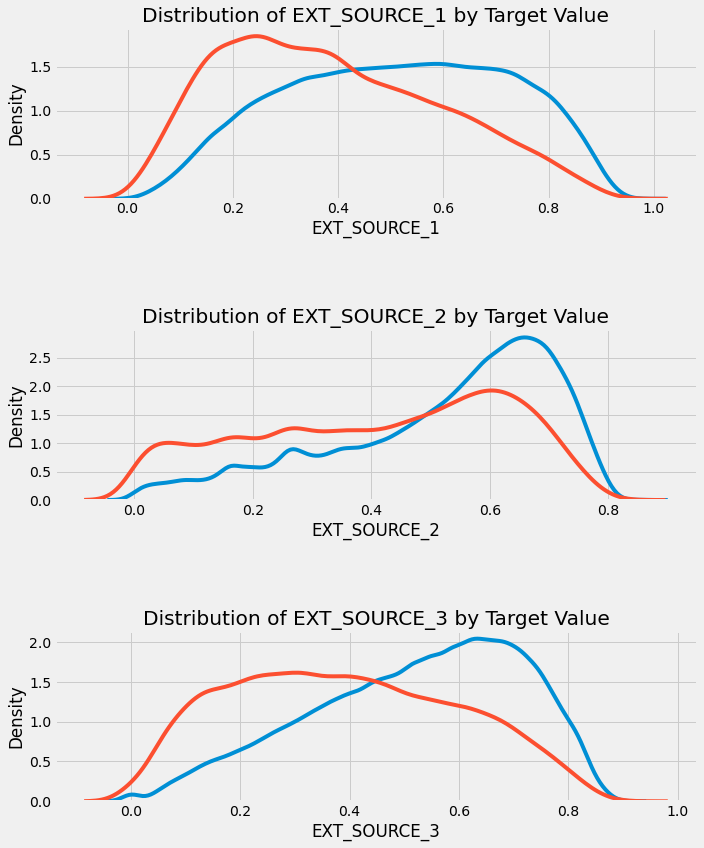

In [41]:
plt.figure(figsize=(10,12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):

  # create a new subplot for each source
  plt.subplot(3, 1, i+1)

  # plot repaid loans
  sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label='target == 0')
  
  # plot loans that were not repaid
  sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label='target == 1')

  # Label the plots
  plt.title('Distribution of %s by Target Value' % source)
  plt.xlabel('%s' % source)
  plt.ylabel('Density')

plt.tight_layout(h_pad = 5)

EXT_SOURCE_3 은 타겟의 값에 따른 아주 큰 차이를 보여줍니다. 우리는 이 피쳐들이 고객이 대출을 상환하는가에 대한 가능도와 관련이 있다고 볼 수 있습니다. 관련성이 크진 않지만, 이 변수들고 머신 러닝 모델이 예측 하는데는 여전히 유용하게 쓰일 것 같습니다.

#### Pairs Plot
최종적인 탐색 그래프로써, EXT_SOURCE와 DAYS_BIRTH로 pairs plot을 그려볼 수 있습니다. Pairs plot은 단일 변수의 분포만 보여줄 뿐 아니라 변수간의 다양한 조합에 대한 분포도 보여주기 때문에 아주 좋은 탐색 도구입니다.

우리는 seaborn 시각화 라이브러리와 PairGrid 함수를 이용해서 upper triangle에는 scatterplot을, 대각 성분에는 히스토그램을, lower triangle에는 2D 커널 밀도 그래프로 이루어진 Pairs Plot을 그리겠습니다.



In [45]:
ext_data.columns

Index(['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'], dtype='object')

In [48]:
plot_data.head()

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BIRTH
0,1,0.083037,0.262949,0.139376,25.920548
6,0,0.774761,0.724000,0.492060,37.747945
8,0,0.587334,0.205747,0.751724,55.065753
10,0,0.319760,0.651862,0.363945,27.936986
11,0,0.722044,0.555183,0.652897,55.936986


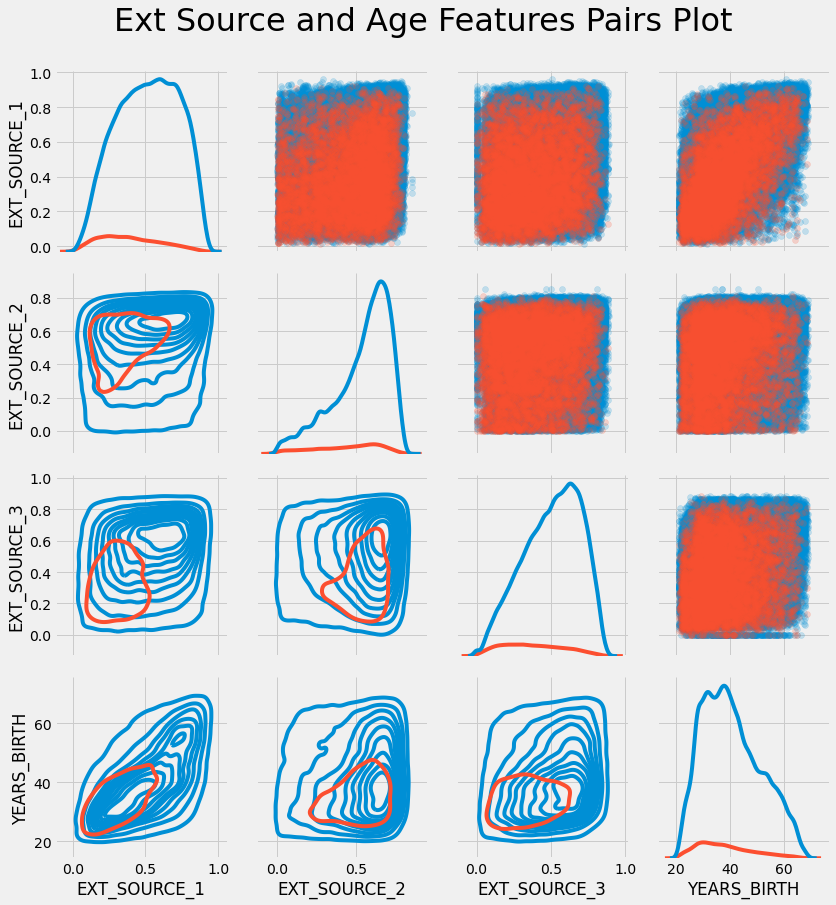

In [50]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
# grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
#                     hue = 'TARGET', 
#                     vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    x_vars = [x for x in list(plot_data.columns) if x != 'TARGET'],
                    y_vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

## Feature Engineering
feature engineering은 일반적인 프로세스를 의미하며, 기존 데이터에서 새로운 피처를 추가하는 feature construction과 가장 중요한 피처를 선택하거나 차원 감소의 다른 방법을 선택하는 feature selection이 있습니다.

많은 feature engineering 방법이 있지만 이 노트북에서는 다음 2가지 방법을 진행하겠습니다.
- Polynomial features
- Domain knowledge features

### Polynomial Features
이 방법을 사용할 때 우리는 피처를 제곱하거나 다른 피처와의 곱셈을 진행하여 피처를 만듭니다. 이렇게 만들어진 피처들은 interaction term이라 불립니다.  
만약 두 변수가 각각 타겟에 대해 그렇게 큰 영향력을 가지고있지 않다고 할 때, single interaction variable로 결합하는 것은 타겟과의 관계를 보여줄 수 있습니다. 하지만 이러한 방법이 머신 러닝에서 쓰이는 것은 잘 못봤습니다.  
그래도 혹시나 우리가 만들 모델의 예측을 도와줄 수 있으니 시도해보겠습니다.

아래 코드에서, 우리는 EXT_SOURCE와 DAYS_BIRTH를 이용해서 polynomial features를 만들겠습니다. 사이킷 런에는 PolynomialFeatures라는 유용한 class를 제공합니다. 우리는 간단하게 3차 다항 변수를 만들겠습니다.

In [54]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer  = SimpleImputer(strategy='median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.fit_transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures

# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [55]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape : ', poly_features.shape)

Polynomial Features shape :  (307511, 35)


상당수의 새로운 피쳐들이 만들어진것읇 볼 수 있습니다. 이름을 한 번 확인해보겠습니다.

In [56]:
poly_transformer.get_feature_names_out(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

array(['1', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'EXT_SOURCE_1^2', 'EXT_SOURCE_1 EXT_SOURCE_2',
       'EXT_SOURCE_1 EXT_SOURCE_3', 'EXT_SOURCE_1 DAYS_BIRTH',
       'EXT_SOURCE_2^2', 'EXT_SOURCE_2 EXT_SOURCE_3',
       'EXT_SOURCE_2 DAYS_BIRTH', 'EXT_SOURCE_3^2',
       'EXT_SOURCE_3 DAYS_BIRTH', 'DAYS_BIRTH^2'], dtype=object)

이제 새로 만들어진 피쳐들이 타겟과 얼마나 연관되어 있는지를 확인하겠습니다.

In [57]:
# Create a dataframe of the features
poly_features = pd.DataFrame(poly_features, columns=poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


몇몇 새로운 변수들을 보면 기존의 변수에 비해 더 많은 연관성이 있는것을 볼 수 있습니다. 우리가 모델을 만들 때, 만들어진 피쳐들을 사용 하거나 안하거나 하면서 실제로 모델에 도움을 주는지 판단할 수 있습니다.



In [58]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial features shape:   (48744, 275)


### Domain Knowledge Features
credit 전문가가 아니기때문에 '도메인 지식'이라고 부느는 것은 옳지 않을 수도 있지만, 이것을 '제한된 금육 지식을 적용하려는 시도'라고 부를 수 있을 것입니다.  
이렇게 마인드를 정립하면, 우리는 고객이 상환을 할지 안할지를 얘기하는데 중요하다고 생각하는 피처를 만들 수 있을것입니다.

- CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
- ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
- CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due
- DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age


In [59]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [60]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

#### Visualize New Variables
이번에도 KDE 그래프를 이용해서 도메인 지식을 이용해 만들어진 변수를 시각화 해보겠습니다.


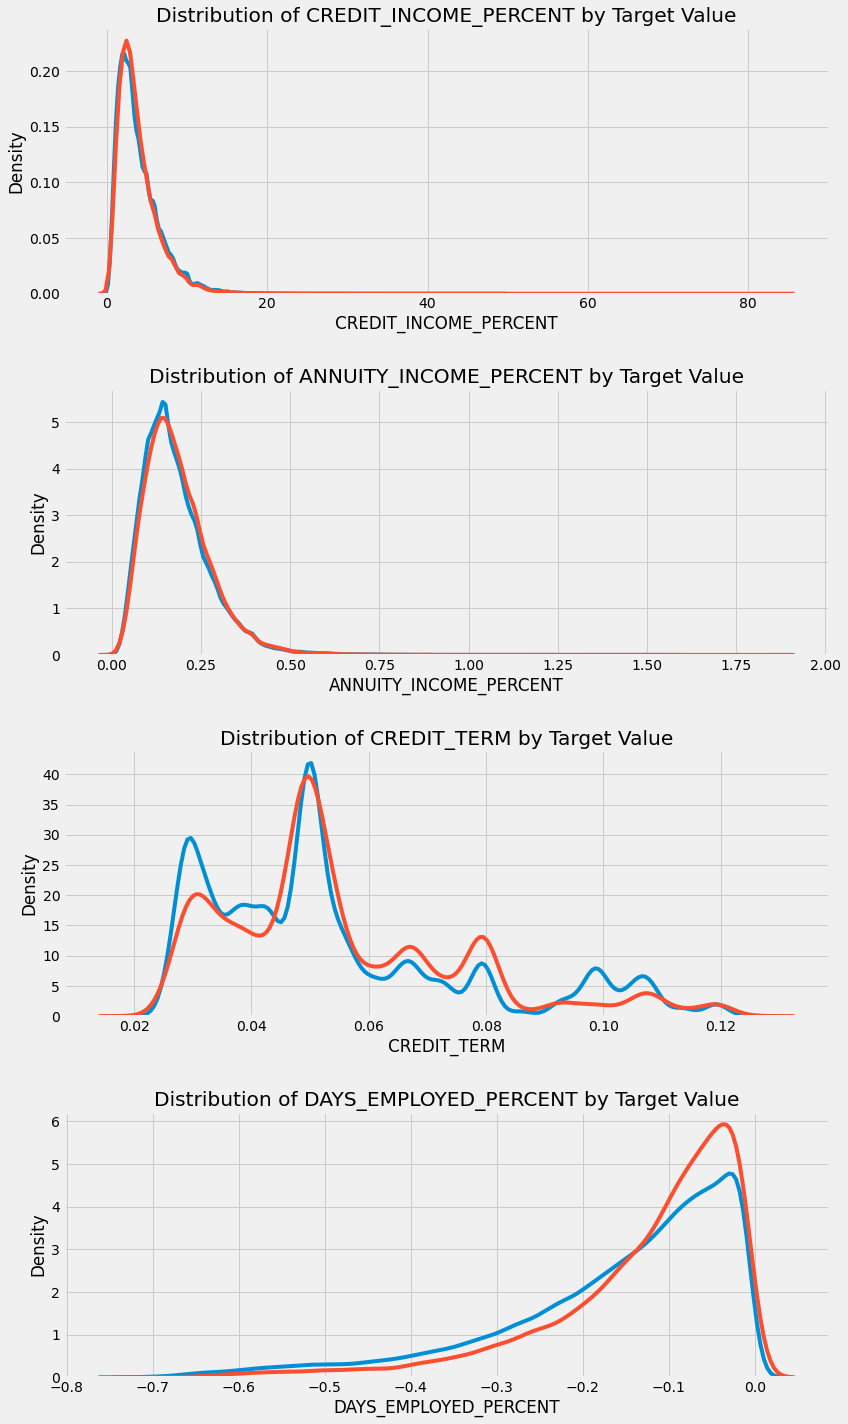

In [61]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

새롭게 만들어진 피쳐들이 유용할지는 지금은 얘기하기 어렵습니다. 직접 사용해보면 알 수 있을 것 같습니다.

## Baseline

### Logistic Regression Implementation

베이스라인을 만들기위해, 우리는 범주형 변수를 인코딩한 모든 피쳐들을 사용할것입니다.

우리는 결측치를 채워넣고(imputation), 피쳐들의 범위를 정규화해주겠습니다(feature scaling).

In [62]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Drop the target from the tarining data
if 'TARGET' in app_train:
  train = app_train.drop(columns = ['TARGET'])
else:
  train = app_train.copy()

# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0,1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)



Training data shape:  (307511, 240)
Testing data shape:  (48744, 240)


우리는 사이킷런의 LogisticRegression을 첫 번째 모델로 사용 하겠습니다. 과적합이 될 위험을 줄이기 위해 규제 파라미터인 C만 낮춰주겠습니다.

In [63]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001)

모델의 훈련이 끝났으니, 예측값을 만들 수 있습니다. 

In [64]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)[:, 1]

The logistic regression baseline should score around 0.671 when submitted.



### Random Forest

베이스라인과 성능을 비교하기 위해 알고리즘을 업데이트 할 수 있습니다. Random Forest를 사용하여 같은 훈련 데이터에 대해 얼마나 성능이 차이나는지 보겠습니다.

In [65]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [66]:
# Train on the training data
random_forest.fit(train, train_labels)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.1s finished


This model should score around 0.678 when submitted.



### Make Predictions using Engineered Features

다항 변수와 도메인 지식을 이용한 변수가 모델의 성능을 향상 시키는지 확인하는 방법은 직접 학습 시켜서 예측해보는 방법 말고는 없습니다.  
우리는 만들어진 피쳐가 없는 데이터로 학습시킨 모델과의 결과 비교를 통해 우리가 진행한 feature engineering의 효과를 측정할 수 있을 것입니다.

In [68]:
poly_features_names = list(app_train_poly.columns)

# Impute the polynomial features
imputer = SimpleImputer(strategy = 'median')

poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.transform(app_test_poly)

# Scale the polynomial features
scaler = MinMaxScaler(feature_range = (0, 1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

random_forest_poly = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [69]:
# Train on the training data
random_forest_poly.fit(poly_features, train_labels)

# Make predictions on the test data
predictions = random_forest_poly.predict_proba(poly_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.0min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.7s finished


This model scored 0.678 when submitted to the competition

이 전과 정확하게 같은 결과가 나왔습니다. 이 경우에는 다항변수를 만드는 방법은 딱히 도움이 되지는 못했습니다.

In [70]:
app_train_domain = app_train_domain.drop(columns = 'TARGET')

domain_features_names = list(app_train_domain.columns)

# Impute the domainnomial features
imputer = SimpleImputer(strategy = 'median')

domain_features = imputer.fit_transform(app_train_domain)
domain_features_test = imputer.transform(app_test_domain)

# Scale the domainnomial features
scaler = MinMaxScaler(feature_range = (0, 1))

domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.transform(domain_features_test)

random_forest_domain = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

# Train on the training data
random_forest_domain.fit(domain_features, train_labels)

# Extract feature importances
feature_importance_values_domain = random_forest_domain.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_values_domain})

# Make predictions on the test data
predictions = random_forest_domain.predict_proba(domain_features_test)[:, 1]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   59.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.1min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.6s finished


This scores 0.679

이 방법도 크게 도움이 되지는 않았습니다. 

### Model Interpretation : Feature Importances
간단한 방법을 이용해서 우리는 랜덤 포레스트에서 피쳐들의 중요도를 확인 할 수 있습니다. 앞서 우리가 EDA를 진행할 때, 우리는 가장 중요한 피쳐로 EXT_SOURCE와 DAYS_BIRTH가 될거라고 예상했습니다.  
우리는 이 피쳐의 중요도를 이용하여 다음에 할 작업에서 차원을 축소하는 방법에 활용할 수 있습니다.

In [71]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

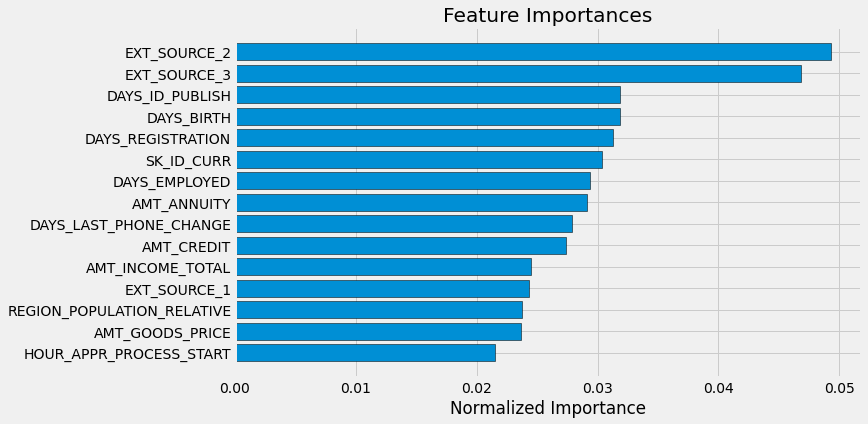

In [72]:
# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)

피쳐 중요도는 모델을 설명하거나 차원 축소를 진행하는 데 있어서 가장 정교한 방법은 아닙니다. 하지만 예측 시 모델이 어떤 요소를 고려하는지 이해할 수 있게 해줍니다.

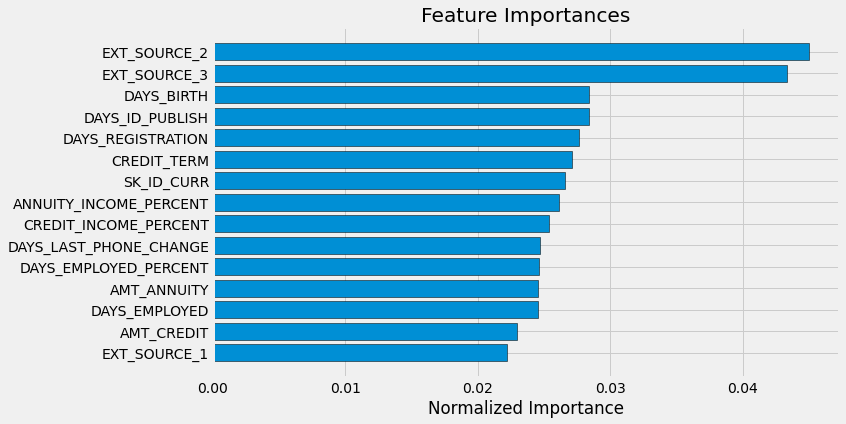

In [73]:
feature_importances_domain_sorted = plot_feature_importances(feature_importances_domain)

## 마무리

이 노트북에서 우리는 어떻게 캐글 머신 러닝 대회를 시작하는지 배웠습니다. 먼저 데이터, 과제, 평가지표를 이해했습니다. 그런 다음 모델링에 도움이 될 수 있는 관계, 추세 또는 이상 현상을 식별하기 위해 아주 간단한 EDA를 수행했습니다. 이러한 과정을 따라가면서, 우리는 범주형 변수 인코딩, 결측치 채워넣기, 피쳐 범위 스케일링등 필요한 전처리 과정을 수행했습니다. 그런 다음, 모델을 도울 수 있는지 보기 위해 새로운 피쳐들을 만들었습니다.

일단 데이터 탐색, 데이터 준비, feature engineering이 끝나고 난 후, 우리는 베이스라인 모델을 실행시켜보았습니다.

우리는 보편적인 머신 러닝 프로젝트의 개요를 따라서 진행했습니다.
1. 문제와 데이터에 대한 이해
2. 데이터 정제와 서식 설정
3. 탐색적 데이터 분석
4. 베이스라인 모델
5. 성능 향상 모델
6. 모델 이해(아주 약간)